In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.metrics import (accuracy_score, precision_score, confusion_matrix, recall_score,
                             f1_score)

In [2]:
data = pd.read_csv('data/raw_data.csv')

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# Separação dos dados entre treino e teste

train, test = train_test_split(data, test_size=0.3, random_state=42)
X_train = train.drop(columns=['fraud'])
X_test = test.drop(columns=['fraud'])
y_train = train['fraud']
y_test = test['fraud']

In [ ]:
print ( 'Tamanho do X_train: ' , X_train.shape) 
print ( 'Tamanho do X_test: ' , X_test.shape) 
print ( 'Proporção do X_test:' , "%s%%" % round (( len (X_test) / ( len (X_train) + len (X_test))) * 100 )) 
print ( 'Tamanho do y_train: ' , y_train.shape) 
print ( 'Tamanho do y_test:' , y_test.shape) 
print ( 'Proporção do y_test:' , "%s%%" % round (( len (y_test) / ( len (y_train) + len (y_test))) * 100 ))

In [ ]:
# Dimensionando dados no conjunto de treinamento

scaler = StandardScaler()
X_train['distance_from_home'] = scaler.fit_transform(X_train.distance_from_home.values.reshape(-1,1))
X_train['distance_from_last_transaction'] = scaler.fit_transform(X_train.distance_from_last_transaction.values.reshape(-1,1))
X_train['ratio_to_median_purchase_price'] = scaler.fit_transform(X_train.ratio_to_median_purchase_price.values.reshape(-1,1))
X_train

In [ ]:
# Dimensionando dados no conjunto de teste

scaler = StandardScaler()
X_test['distance_from_home'] = scaler.fit_transform(X_test.distance_from_home.values.reshape(-1,1))
X_test['distance_from_last_transaction'] = scaler.fit_transform(X_test.distance_from_last_transaction.values.reshape(-1,1))
X_test['ratio_to_median_purchase_price'] = scaler.fit_transform(X_test.ratio_to_median_purchase_price.values.reshape(-1,1))
X_test

In [5]:
# Aplicando o Classificador de Floresta Aleatória
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42) 
random_forest.fit(X_train, y_train) 
 
y_predictions_rf = random_forest.predict(X_test) 
 
# # Aplicando o classificador Ada Boost
# ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 42) 
# ada_boost.fit(X_train,y_train) 
 
# y_predictions_ab = ada_boost.predict(X_test) 
 
# # Aplicando o classificador Gradient Boosting
# gradiente_boosting = GradientBoostingClassifier (n_estimators = 100, random_state = 42) 
# gradiente_boosting.fit (X_train, y_train) 
 
# y_prediction_gb = gradiente_boosting.predict (X_test)

In [6]:
# Métricas de avaliação para

random_forest_metric = [['Accurary', (accuracy_score(y_test, y_predictions_rf))],
                        ['Precision', (precision_score(y_test, y_predictions_rf))],
                        ['Recall', (recall_score(y_test, y_predictions_rf))],
                        ['F1_score', f1_score(y_test, y_predictions_rf)]]

metricas_rf = pd.DataFrame(random_forest_metric, columns=["Métrica", "Resultados"])
metricas_rf

,Métrica,Resultados
0,Accurary,0.999993
1,Precision,1.000000
2,Recall,0.999923
3,F1_score,0.999962


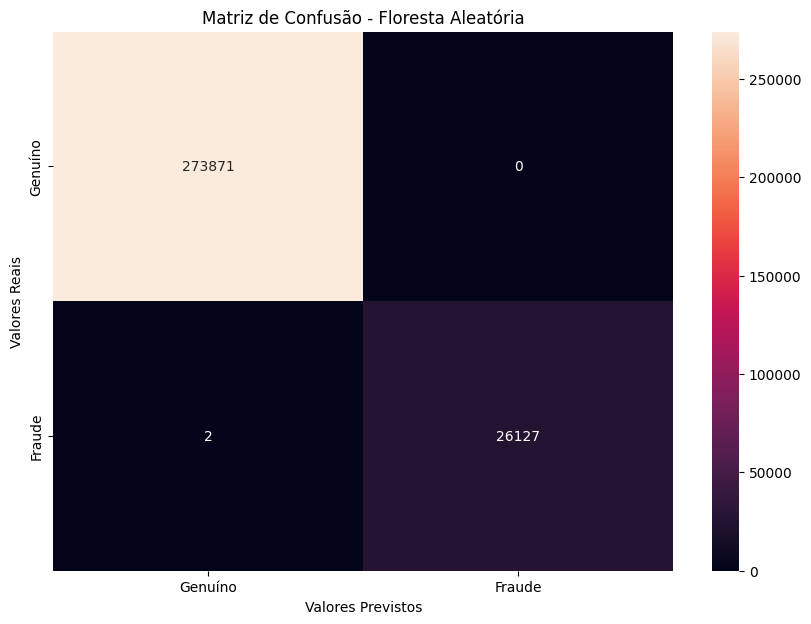

In [7]:
# Matriz de confusão para Random Forest

confusion_matrix_rf = confusion_matrix(y_test, y_predictions_rf)

# Visualização

plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt="g", ax= ax)
ax.set_xlabel( 'Valores Previstos' ) 
ax.set_ylabel( 'Valores Reais' ) 
ax.set_title( 'Matriz de Confusão - Floresta Aleatória' ) 
ax.xaxis.set_ticklabels([ 'Genuíno' , 'Fraude' ]) 
ax.yaxis.set_ticklabels([ 'Genuíno' , 'Fraude' ]) 
plt.show()

In [ ]:
# Métricas de avaliação para

ab_metric = [['Accurary', (accuracy_score(y_test, y_predictions_ab))],
                        ['Precision', (precision_score(y_test, y_predictions_ab))],
                        ['Recall', (recall_score(y_test, y_predictions_ab))],
                        ['F1_score', f1_score(y_test, y_predictions_ab)]]

metricas_ab = pd.DataFrame(ab_metric, columns=["Métrica", "Resultados"])
metricas_ab

In [ ]:
# Matriz de confusão para Ada Boost

confusion_matrix_ab = confusion_matrix(y_test, y_predictions_ab)

# Visualização

plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt="g", ax= ax)
ax.set_xlabel( 'Valores Previstos' ) 
ax.set_ylabel( 'Valores Reais' ) 
ax.set_title( 'Matriz de Confusão - Ada Boost' ) 
ax.xaxis.set_ticklabels([ 'Genuíno' , 'Fraude' ]) 
ax.yaxis.set_ticklabels([ 'Genuíno' , 'Fraude' ]) 
plt.show()

In [ ]:
# Métricas de avaliação para

gradiente_boosting_metric = [['Accurary', (accuracy_score(y_test, y_prediction_gb))],
                        ['Precision', (precision_score(y_test, y_prediction_gb))],
                        ['Recall', (recall_score(y_test, y_prediction_gb))],
                        ['F1_score', f1_score(y_test, y_prediction_gb)]]

metricas_gb = pd.DataFrame(gradiente_boosting_metric, columns=["Métrica", "Resultados"])
metricas_gb

In [ ]:
# Matriz de confusão para Gradient Boost

confusion_matrix_gb = confusion_matrix(y_test, y_prediction_gb)

# Visualização

plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt="g", ax= ax)
ax.set_xlabel( 'Valores Previstos' ) 
ax.set_ylabel( 'Valores Reais' ) 
ax.set_title( 'Matriz de Confusão - Gradient Boost' ) 
ax.xaxis.set_ticklabels([ 'Genuíno' , 'Fraude' ]) 
ax.yaxis.set_ticklabels([ 'Genuíno' , 'Fraude' ]) 
plt.show()